# Gender Recognition by Voice

### 1. Sourcing and loading 

#### 1a. Importing relevant libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn import preprocessing 
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm

from sklearn.metrics import accuracy_score, f1_score, classification_report

%matplotlib inline


C:\Users\Shristi\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


#### 1b. Loading the Gender Recognition by Voice Dataset 

In [3]:
df= pd.read_csv("C:\\Users\\Shristi\\Desktop\\Springboard\\capstone2\\voice.csv")
df.head()

meanfreq        sd    median       Q25       Q75       IQR       skew  \
0  0.059781  0.064241  0.032027  0.015071  0.090193  0.075122  12.863462   
1  0.066009  0.067310  0.040229  0.019414  0.092666  0.073252  22.423285   
2  0.077316  0.083829  0.036718  0.008701  0.131908  0.123207  30.757155   
3  0.151228  0.072111  0.158011  0.096582  0.207955  0.111374   1.232831   
4  0.135120  0.079146  0.124656  0.078720  0.206045  0.127325   1.101174   

          kurt    sp.ent       sfm  ...  centroid   meanfun    minfun  \
0   274.402906  0.893369  0.491918  ...  0.059781  0.084279  0.015702   
1   634.613855  0.892193  0.513724  ...  0.066009  0.107937  0.015826   
2  1024.927705  0.846389  0.478905  ...  0.077316  0.098706  0.015656   
3     4.177296  0.963322  0.727232  ...  0.151228  0.088965  0.017798   
4     4.333713  0.971955  0.783568  ...  0.135120  0.106398  0.016931   

     maxfun   meandom    mindom    maxdom   dfrange   modindx  label  
0  0.275862  0.007812  0.007812  0.007812  0.000000  0.000000   male  
1  0.250000  0.009014  0.007812  0.054688  0.046875  0.052632   male  
2  0.271186  0.007990  0.007812  0.015625  0.007812  0.046512   male  
3  0.250000  0.201497  0.007812  0.562500  0.554688  0.247119   male  
4  0.266667  0.712812  0.007812  5.484375  5.476562  0.208274   male  

[5 rows x 21 columns]

In [4]:
df.dtypes

meanfreq    float64
sd          float64
median      float64
Q25         float64
Q75         float64
IQR         float64
skew        float64
kurt        float64
sp.ent      float64
sfm         float64
mode        float64
centroid    float64
meanfun     float64
minfun      float64
maxfun      float64
meandom     float64
mindom      float64
maxdom      float64
dfrange     float64
modindx     float64
label        object
dtype: object

In [5]:
df.describe()

meanfreq           sd       median          Q25          Q75  \
count  3168.000000  3168.000000  3168.000000  3168.000000  3168.000000   
mean      0.180907     0.057126     0.185621     0.140456     0.224765   
std       0.029918     0.016652     0.036360     0.048680     0.023639   
min       0.039363     0.018363     0.010975     0.000229     0.042946   
25%       0.163662     0.041954     0.169593     0.111087     0.208747   
50%       0.184838     0.059155     0.190032     0.140286     0.225684   
75%       0.199146     0.067020     0.210618     0.175939     0.243660   
max       0.251124     0.115273     0.261224     0.247347     0.273469   

               IQR         skew         kurt       sp.ent          sfm  \
count  3168.000000  3168.000000  3168.000000  3168.000000  3168.000000   
mean      0.084309     3.140168    36.568461     0.895127     0.408216   
std       0.042783     4.240529   134.928661     0.044980     0.177521   
min       0.014558     0.141735     2.068455     0.738651     0.036876   
25%       0.042560     1.649569     5.669547     0.861811     0.258041   
50%       0.094280     2.197101     8.318463     0.901767     0.396335   
75%       0.114175     2.931694    13.648905     0.928713     0.533676   
max       0.252225    34.725453  1309.612887     0.981997     0.842936   

              mode     centroid      meanfun       minfun       maxfun  \
count  3168.000000  3168.000000  3168.000000  3168.000000  3168.000000   
mean      0.165282     0.180907     0.142807     0.036802     0.258842   
std       0.077203     0.029918     0.032304     0.019220     0.030077   
min       0.000000     0.039363     0.055565     0.009775     0.103093   
25%       0.118016     0.163662     0.116998     0.018223     0.253968   
50%       0.186599     0.184838     0.140519     0.046110     0.271186   
75%       0.221104     0.199146     0.169581     0.047904     0.277457   
max       0.280000     0.251124     0.237636     0.204082     0.279114   

           meandom       mindom       maxdom      dfrange      modindx  
count  3168.000000  3168.000000  3168.000000  3168.000000  3168.000000  
mean      0.829211     0.052647     5.047277     4.994630     0.173752  
std       0.525205     0.063299     3.521157     3.520039     0.119454  
min       0.007812     0.004883     0.007812     0.000000     0.000000  
25%       0.419828     0.007812     2.070312     2.044922     0.099766  
50%       0.765795     0.023438     4.992188     4.945312     0.139357  
75%       1.177166     0.070312     7.007812     6.992188     0.209183  
max       2.957682     0.458984    21.867188    21.843750     0.932374

In [6]:
df.isna().sum()

meanfreq    0
sd          0
median      0
Q25         0
Q75         0
IQR         0
skew        0
kurt        0
sp.ent      0
sfm         0
mode        0
centroid    0
meanfun     0
minfun      0
maxfun      0
meandom     0
mindom      0
maxdom      0
dfrange     0
modindx     0
label       0
dtype: int64

Creating a dummy variable 'gender' for the binary variable 'label'

In [7]:
label_encoder = preprocessing.LabelEncoder() 
df['gender']= label_encoder.fit_transform(df['label']) 
df= df.drop(columns= ['label'])
df.tail()


meanfreq        sd    median       Q25       Q75       IQR      skew  \
3163  0.131884  0.084734  0.153707  0.049285  0.201144  0.151859  1.762129   
3164  0.116221  0.089221  0.076758  0.042718  0.204911  0.162193  0.693730   
3165  0.142056  0.095798  0.183731  0.033424  0.224360  0.190936  1.876502   
3166  0.143659  0.090628  0.184976  0.043508  0.219943  0.176435  1.591065   
3167  0.165509  0.092884  0.183044  0.070072  0.250827  0.180756  1.705029   

          kurt    sp.ent       sfm  ...  centroid   meanfun    minfun  \
3163  6.630383  0.962934  0.763182  ...  0.131884  0.182790  0.083770   
3164  2.503954  0.960716  0.709570  ...  0.116221  0.188980  0.034409   
3165  6.604509  0.946854  0.654196  ...  0.142056  0.209918  0.039506   
3166  5.388298  0.950436  0.675470  ...  0.143659  0.172375  0.034483   
3167  5.769115  0.938829  0.601529  ...  0.165509  0.185607  0.062257   

        maxfun   meandom    mindom    maxdom   dfrange   modindx  gender  
3163  0.262295  0.832899  0.007812  4.210938  4.203125  0.161929       0  
3164  0.275862  0.909856  0.039062  3.679688  3.640625  0.277897       0  
3165  0.275862  0.494271  0.007812  2.937500  2.929688  0.194759       0  
3166  0.250000  0.791360  0.007812  3.593750  3.585938  0.311002       0  
3167  0.271186  0.227022  0.007812  0.554688  0.546875  0.350000       0  

[5 rows x 21 columns]

In [8]:
df.gender.value_counts()

1    1584
0    1584
Name: gender, dtype: int64

### 2. Exploring and visualizing the data set

#### 2a. Creating histogram for all the variables

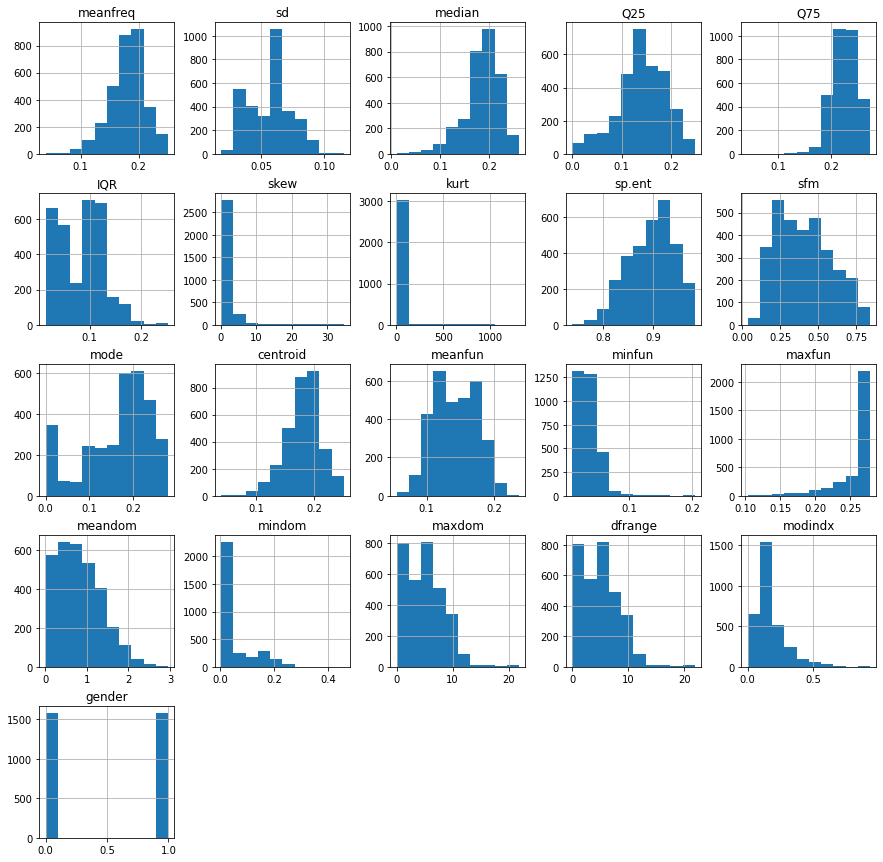

In [13]:
_=df.hist(figsize=(15,15))

#### 2b. Creating Heatmap

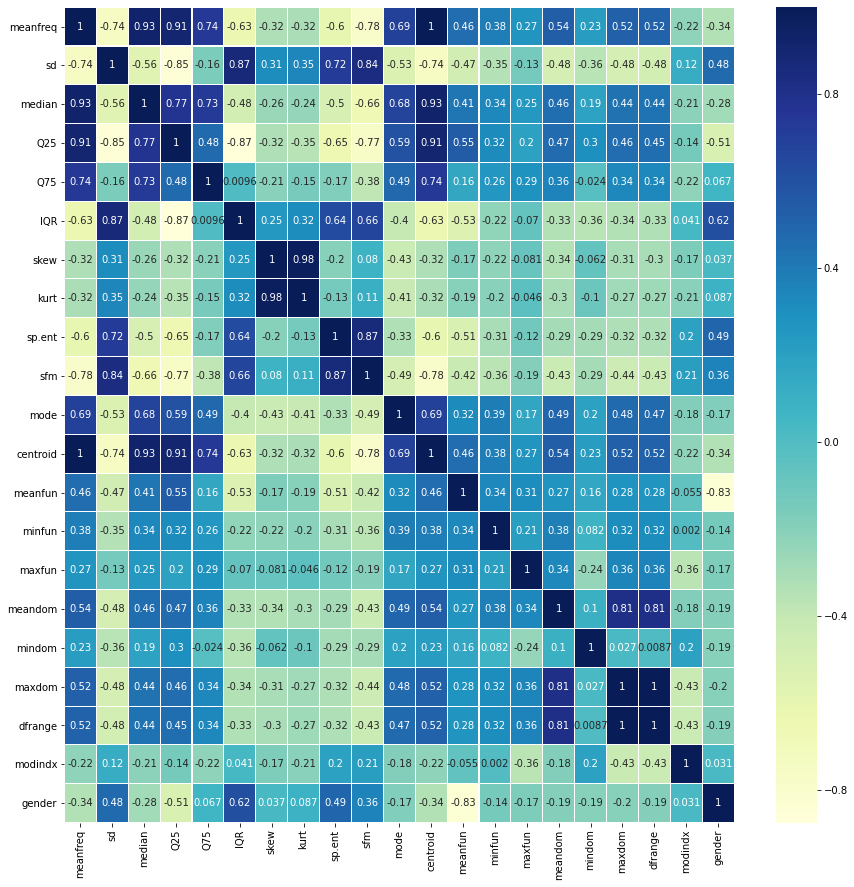

In [10]:
plt.figure(figsize=(15,15))
heatmap= sns.heatmap(df.corr(), linewidth= .1, annot= True, cmap='YlGnBu')
plt.yticks(rotation= 0)

#Saving heatmap as png. 
figure = heatmap.get_figure()    
figure.savefig('sns_heatmap.png', dpi=400)

There is a small patch from IQR to sfm which has less correlation among each other and high correlation with the target variable "gender". There are few other highly correlated variables with "gender". Those are meanfun, sd, Q25. Lets try to visulaize only highly correlated variables with "gender" using pairplots.

#### 2c. Pair plots

C:\Users\Shristi\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\Shristi\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\Users\Shristi\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\Shristi\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


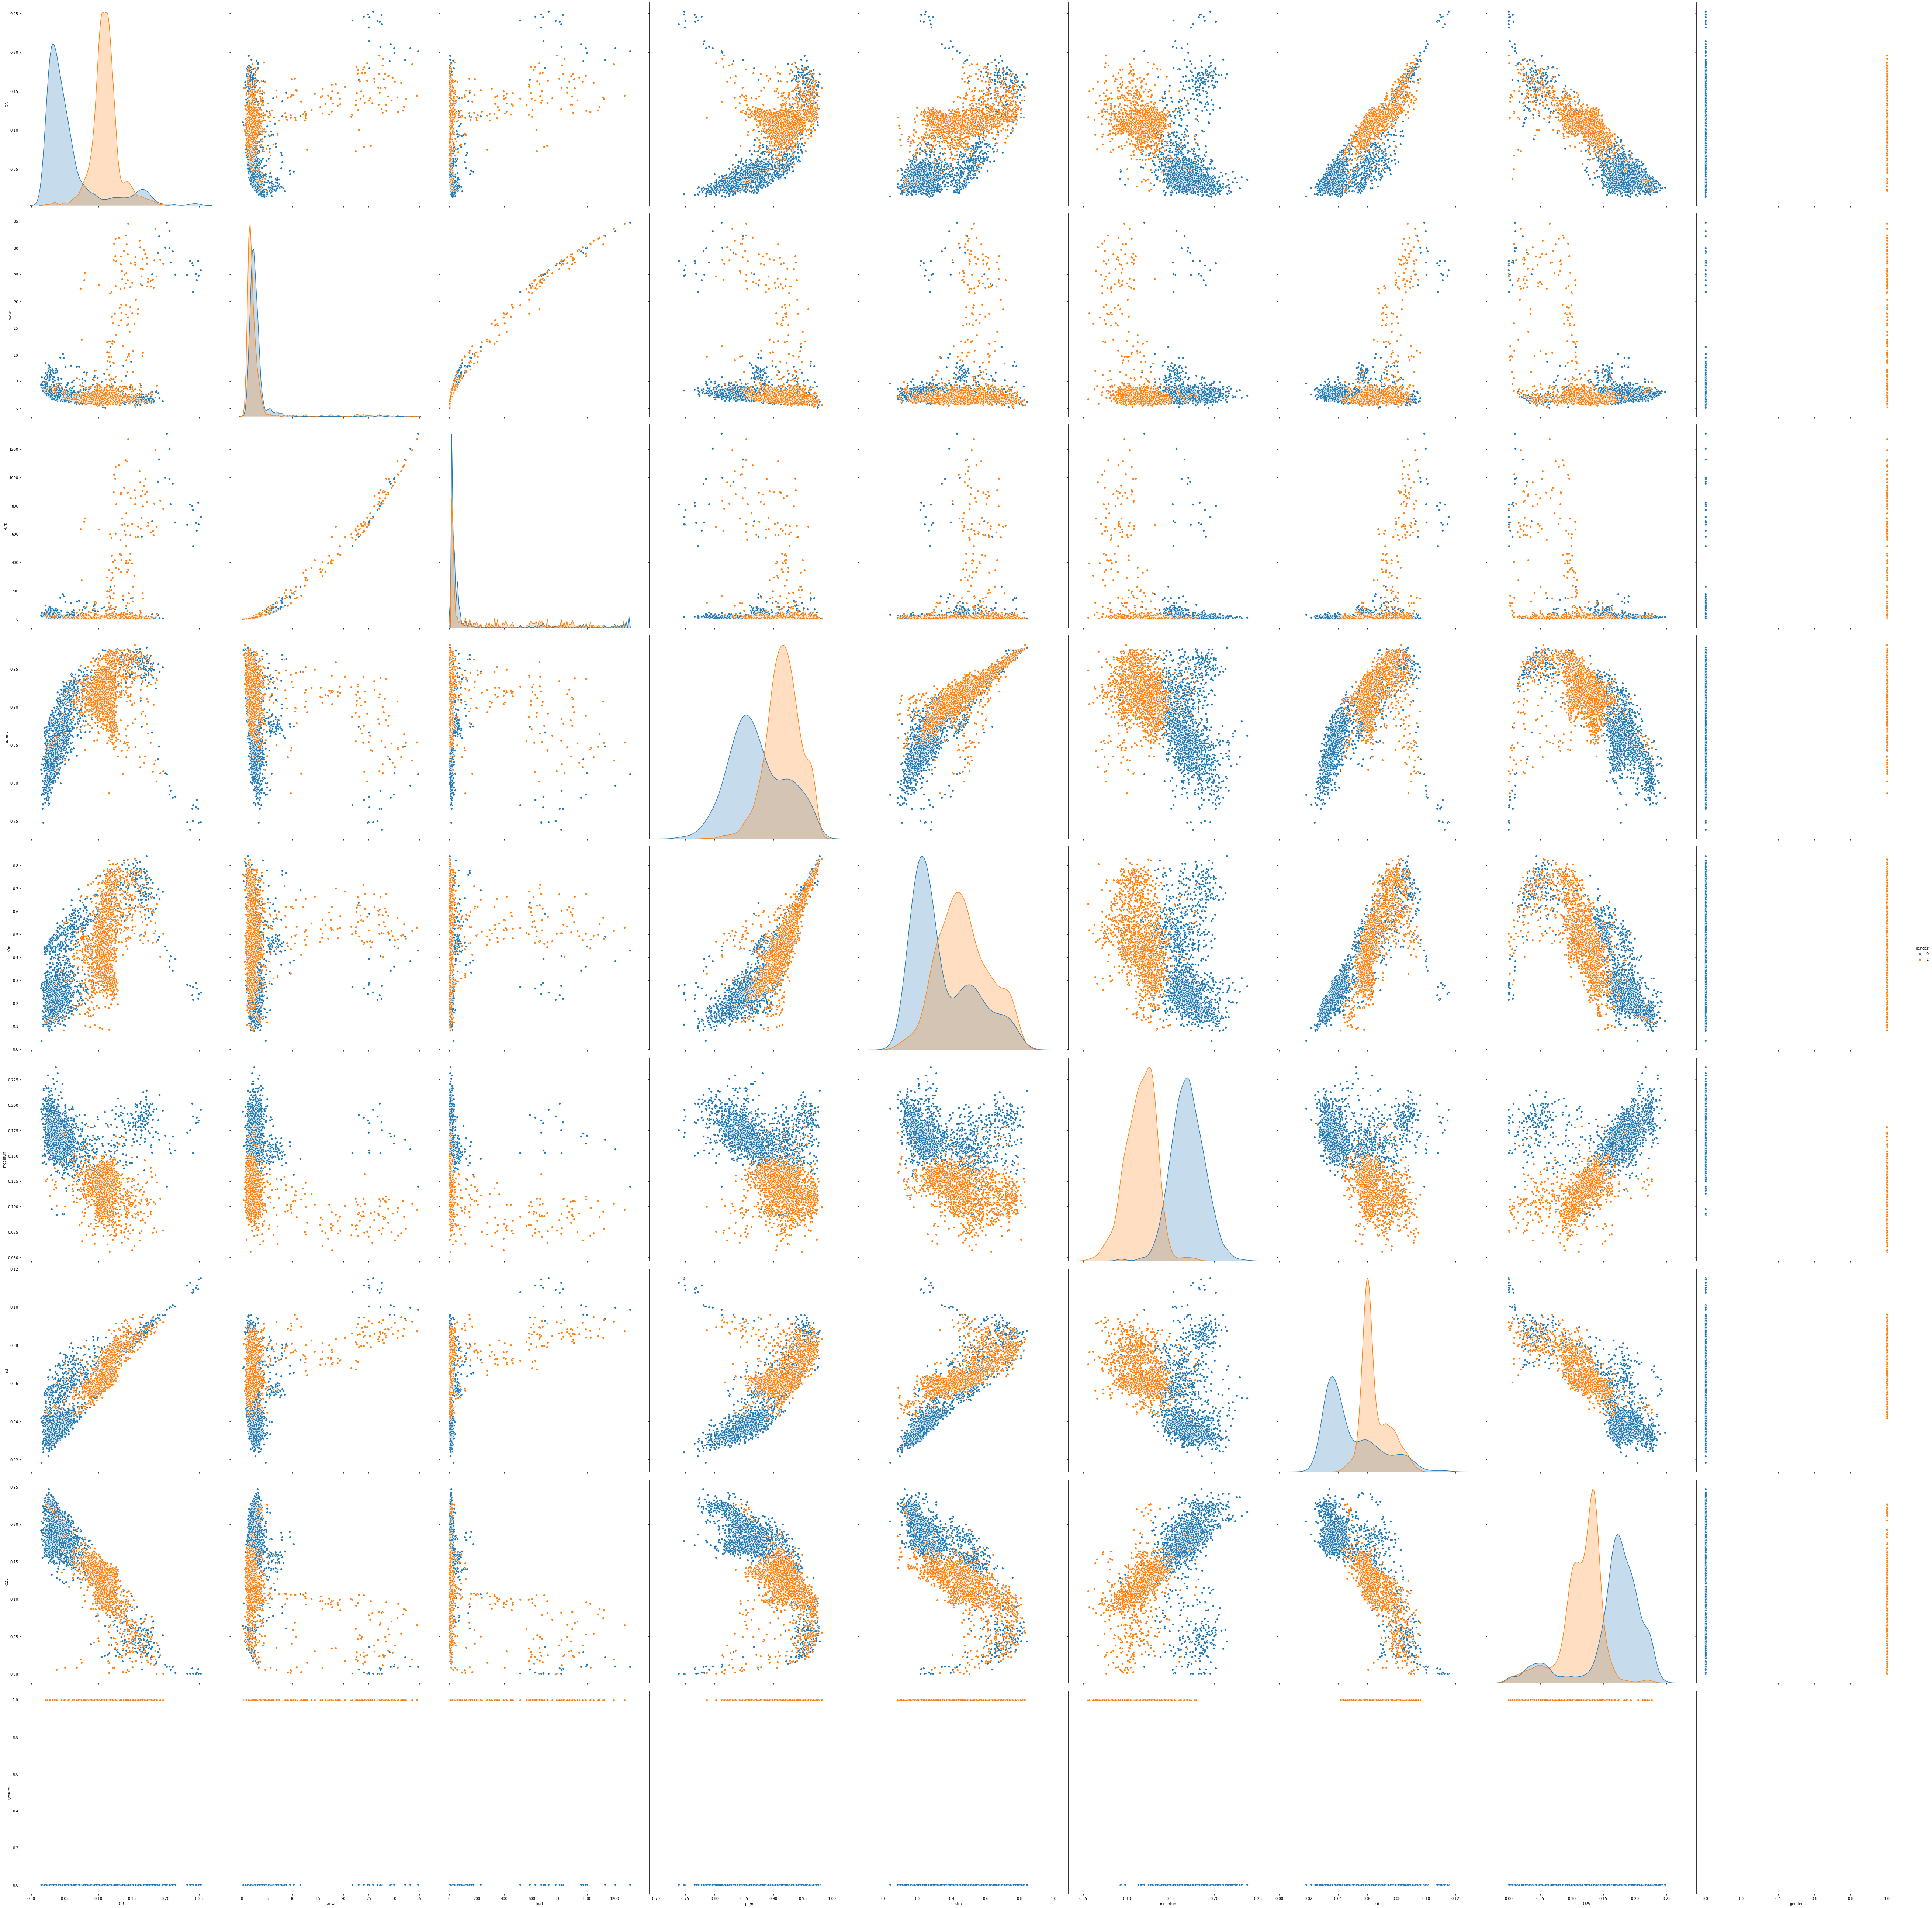

In [11]:
sns.pairplot(df[['IQR','skew', 'kurt', 'sp.ent','sfm','meanfun','sd','Q25','gender']],hue='gender', height=8)

### 3. Data Modeling

##### splitting data frame into train and test sets

In [12]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('gender', axis=1), df['gender'], test_size=0.33, random_state=1)

##### Standardizing X_train and X_test

In [13]:
scaler= StandardScaler()
X_train_scaled= scaler.fit_transform(X_train)
X_test_scaled= scaler.transform(X_test)

#### 3.1 Logistic Regression

We are trying to select best features which are helpful in predicting gender and then fitting Logistic Regression model

#### 3.1a Selecting best features and ploting the scores

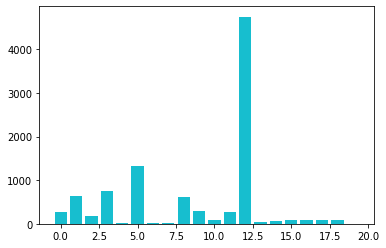

['sd', 'Q25', 'IQR', 'sp.ent', 'meanfun']

In [14]:
fs = SelectKBest(score_func=f_classif, k=5)
X_train_fs = fs.fit_transform(X_train_scaled, y_train)
X_test_fs = fs.transform(X_test_scaled)

#Plot the scores
for i in range(len(fs.scores_)):
#    print('Feature %d: %f' % (i, fs.scores_[i]))
    _=plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
plt.show()

#Getting all 5 selected features
cols = fs.get_support(indices=True)
Kbest = df.iloc[:,cols]
kbest_features=list(Kbest.columns)
kbest_features


#### 3.1b Fitting the Logistic Regression model on 5 selected best features

In [15]:
#fitting the Logistic Regression Model

modelLR = LogisticRegression(solver='liblinear')
modelLR.fit(X_train_fs, y_train)

# evaluate the model
y_pred_testLR = modelLR.predict(X_test_fs)

# evaluate predictions
accuracy = accuracy_score(y_test, y_pred_testLR)
print('Accuracy on test data with basic model: %.2f' % (accuracy*100))

Accuracy on test data with basic model: 96.65


#### 3.1c Tuning hyperparametrs for Logistic Regression model using grid search and cross validating 

In [16]:
param_grid_LR = {'C':[1, 10, 100, 1000]}
gridLR = GridSearchCV(modelLR, param_grid_LR, cv=5)
gridLR.fit(X_train_fs, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='liblinear',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=None, param_grid={'C': [1, 10, 100, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [17]:
print(gridLR.best_params_)
print(gridLR.best_score_)
print(gridLR.best_estimator_)

{'C': 100}
0.9717247879359096
LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)


In [18]:
ypred_test_gridLR = gridLR.predict(X_test_fs)


In [19]:
print("Accuracy on test data with grid search: %.2f" %(accuracy_score(y_test, ypred_test_gridLR)*100))


Accuracy on test data with grid search: 96.94


#### 3.1d Plotting Confusion matrix


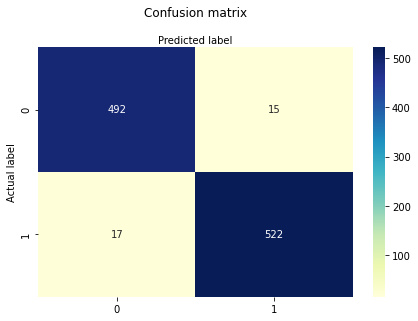

In [20]:
from sklearn import metrics
cnf_matrixLR = metrics.confusion_matrix(y_test, ypred_test_gridLR)

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrixLR), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

plt.savefig('confusion matrix.png', dpi=400)